In [43]:
# author: metaquant
# created: 2018-9-14
# blog: https://md.metaquant.org
# GitHub: https://github.com/sorrowise
# repo: https://github.com/sorrowise/chinese_data_analysis

<h2 style="font-style:italic;font-family:Georgia;color:green">Introduction</h2>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">About 80 years ago, Harvard linguist George Kingsley Zipf studied the word frequency distribution in English and found an empirical rule.Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number N has a frequency proportional to 1/N.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Thus the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. For example, in one sample of words in the English language, the most frequently occurring word, "the", accounts for nearly 7% of all the words (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word "of" accounts for slightly over 3.5% of words (36,411 occurrences), followed by "and" (28,852). Only about 135 words are needed to account for half the sample of words in a large sample.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency).The data conform to Zipf's law to the extent that the plot is linear.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Zipf’s Law holds for all languages, even non-natural ones like Esperanto. For example,a plot of the rank versus frequency for the first 10 million words in 30 Wikipedias (dumps from October 2015) in a log-log scale can be seen below.</p>

<img src="https://ws1.sinaimg.cn/large/005LuiSpgy1fv87i85hrpj30zk0qon25.jpg">

<p style="font-size:16px;font-family:Courier New;font-weight:bold">A very natural question is, how is the applicability of the law in Chinese?As a hieroglyph, Chinese are significantly different from the alphabetic writing represented by English. The basic unit of Chinese is a single character, and then the two characters constitute two-characters word and three-characters word to express more complex meanings. The basic unit of alphabetic writing is a single word, and the extension of meaning is achieved by creating new words or stitching existing words into new words. Therefore, English can count word frequency in units of words, while Chinese must use vocabulary as the basic unit to count, which includes both one-character words and multi-characters words. Only in this way can we accurately describe the distribution of Chinese word frequencies.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Using the <a href="http://corpus.zhonghuayuwen.org/Resources.aspx">online corpus word frequency data</a> provided by the Computational Linguistics Research Institute of the Ministry of Education, we can test the applicability of Zipf's law in Chinese and deepen our understanding of the frequency distribution of Chinese words. Since the above data does not include the number of strokes of Chinese characters, we can use the <a href="http://lingua.mtsu.edu/chinese-computing/statistics/char/list.php?Which=MO">list of modern Chinese single-word frequencies</a> provided by Qi Jun to further study the distribution of the number of strokes in Chinese characters.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">I use jupyter notebook to analyze the above data, related notebooks and data files have been uploaded to <a href="https://github.com/sorrowise/chinese_data_analysis">this repo</a>, you can download the data for analysis and verification. The copyright of the data file belongs to the original author. If there is any infringement, please inform me to delete it.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">OK,Let's start the data adventure</p>

In [44]:
# Import the required modules for the following codes

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white",color_codes=True)
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9.27)

<h2 style="font-style:italic;font-family:Georgia;color:green">Analysis of the Distribution Law of Chinese Word Frequency</h2>

In [45]:
# import data

df = pd.read_excel('word_freq.xlsx')
df.head(10)

,rank,word,freq,freq_percent,cum_freq_percent
0,1,的,744863,7.7946,7.7946
1,2,了,130191,1.3624,9.1570
2,3,在,118823,1.2434,10.4004
3,4,是,118527,1.2403,11.6407
4,5,和,83958,0.8786,12.5193
5,6,一,81119,0.8489,13.3682
6,7,这,65146,0.6817,14.0499
7,8,有,53556,0.5604,14.6103
8,9,他,52912,0.5537,15.1640
9,10,我,52728,0.5518,15.7158


<p style="font-size:16px;font-family:Courier New;font-weight:bold">Calculate three new columns of data, which are: the logarithm of the frequency ranking, the logarithm of the frequency, and the number of Chinese characters in the words.</p>

In [46]:
df['log_rank'] = np.log10(df['rank'])
df['log_freq'] = np.log10(df['freq'])
df['word_count'] = df['word'].apply(len)
df.head(10)

,rank,word,freq,freq_percent,cum_freq_percent,log_rank,log_freq,word_count
0,1,的,744863,7.7946,7.7946,0.000000,5.872076,1
1,2,了,130191,1.3624,9.1570,0.301030,5.114581,1
2,3,在,118823,1.2434,10.4004,0.477121,5.074901,1
3,4,是,118527,1.2403,11.6407,0.602060,5.073817,1
4,5,和,83958,0.8786,12.5193,0.698970,4.924062,1
5,6,一,81119,0.8489,13.3682,0.778151,4.909123,1
6,7,这,65146,0.6817,14.0499,0.845098,4.813888,1
7,8,有,53556,0.5604,14.6103,0.903090,4.728808,1
8,9,他,52912,0.5537,15.1640,0.954243,4.723554,1
9,10,我,52728,0.5518,15.7158,1.000000,4.722041,1


In [47]:
# Count the frequency and frequency of occurrences of words of various lengths

word_length = pd.DataFrame(df.word_count.value_counts()).sort_index()
word_length.columns = ['freq']
word_length['freq_percent'] = 100*word_length['freq']/sum(word_length['freq'])
word_length.head(10)

,freq,freq_percent
1,2391,16.344248
2,10476,71.611183
3,1181,8.073006
4,506,3.458883
5,43,0.293937
6,22,0.150386
7,8,0.054686
8,1,0.006836
10,1,0.006836


Text(0.5,1,'number of characters v.s. frequency')

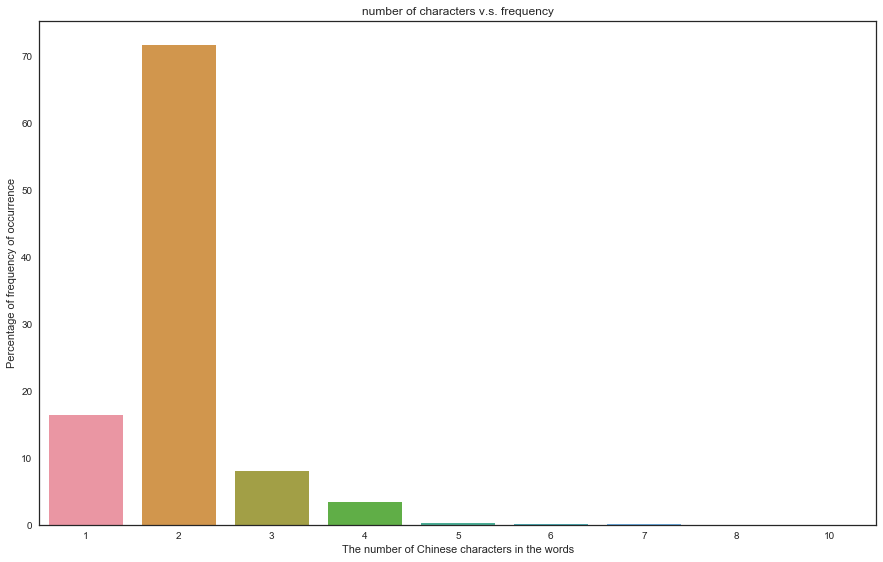

In [48]:
# And plot a histogram of the frequency

x,index = np.arange(1,11),[8]
sns.barplot(np.delete(x,index),word_length.freq_percent)
plt.xlabel('The number of Chinese characters in the words')
plt.ylabel('Percentage of frequency of occurrence')
plt.title('number of characters v.s. frequency')

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Let us check whether the relationship between frequency and frequency ranking of Chinese words matches zipf's law.</p>

Text(0.5,1,'The relationship between the logarithm of the frequency ranking and the logarithm of the frequency')

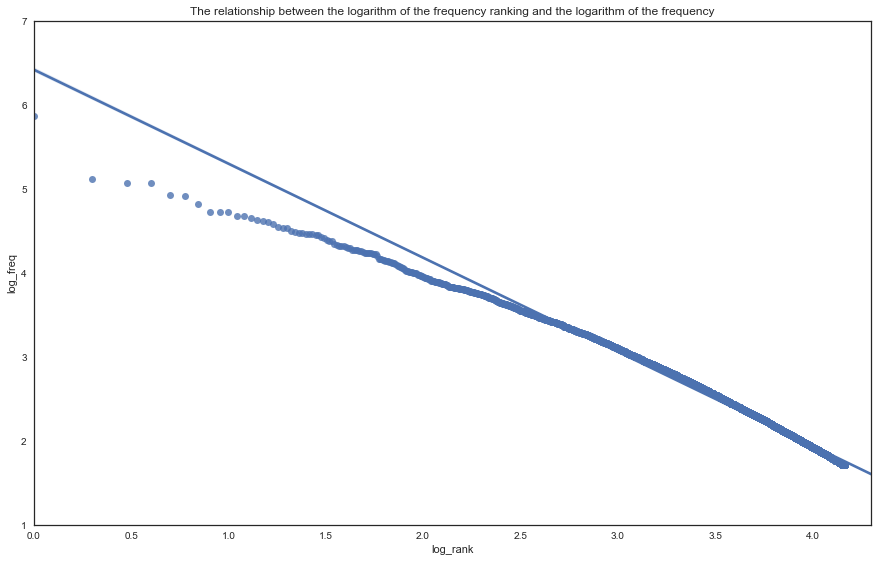

In [49]:
sns.regplot(df.log_rank,df.log_freq)
plt.xlim(0,4.3)
plt.ylim(1,7)
plt.title('The relationship between the logarithm of the frequency ranking and the logarithm of the frequency')

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Let's do a linear regression on two variables. At first, we define a helper function that calls the linear regression function of the statamodels library and returns the relevant results. Next, we use the logarithm of the frequency as the dependent variable and the logarithm of the frequency ranking as the independent variable.</p>

In [50]:
def reg(y,*args):
    import statsmodels.api as sm
    x = np.vstack((args)).T
    mat_x = sm.add_constant(x)
    res = sm.OLS(y,mat_x).fit()
    print(res.summary())

reg(df.log_rank,df.log_freq)

                            OLS Regression Results                            
Dep. Variable:               log_rank   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.502e+06
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:57   Log-Likelihood:                 25420.
No. Observations:               14629   AIC:                        -5.084e+04
Df Residuals:                   14627   BIC:                        -5.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7144      0.002   3450.432      0.0

<p style="font-size:16px;font-family:Courier New;font-weight:bold">We can find that R^2=0.99 and the constant term and the independent variable are significant, which means that the distribution of word frequency in Chinese is also in line with zipf's law.But we can also find that the words of low frequency are more in line with zipf's law than the words of high frequency. <u>The frequency of high frequency words is lower than the prediction of zipf's law</u>, which can be observed from the fact that this part of the data points is below the fitted line.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">This phenomenon can be seen more clearly in the residual plots below.The absolute value of the residual increases as the independent variable increases, and then decreases as the independent variable increases. Therefore, the word frequency distribution of middle frequency words is more in line with zipf's law.</p>

Text(0.5,1,'The relationship between the residual and the logarithm of the frequency ranking')

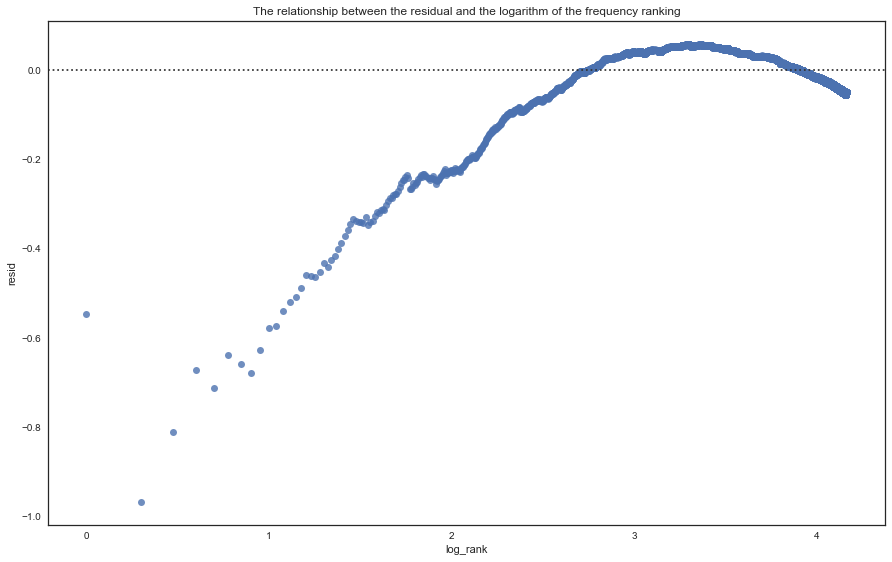

In [51]:
sns.residplot(df.log_rank,df.log_freq)
plt.ylabel('resid')
plt.title('The relationship between the residual and the logarithm of the frequency ranking')

<p style="font-size:16px;font-family:Courier New;font-weight:bold">So we can divide the frequency data into four groups according to the frequency quartile and then do the regression separately.</p>

Text(0,0.5,'')

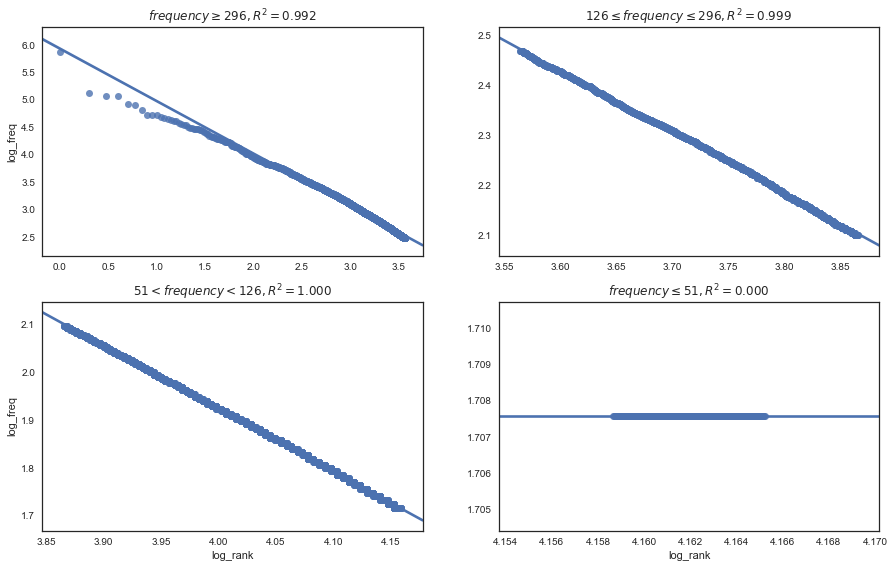

In [52]:
log_rank_first = df.log_rank[df.freq>=296]
log_freq_first = df.log_freq[df.freq>=296]
log_rank_second = df.log_rank[(126<=df.freq) & (df.freq<296)]
log_freq_second = df.log_freq[(126<=df.freq) & (df.freq<296)]
log_rank_third = df.log_rank[(51<df.freq) & (df.freq<126)]
log_freq_third = df.log_freq[(51<df.freq) & (df.freq<126)]
log_rank_fourth = df.log_rank[df.freq<=51]
log_freq_fourth = df.log_freq[df.freq<=51]


plt.subplot(221)
sns.regplot(log_rank_first,log_freq_first)
plt.title('$frequency \geq 296,R^2=0.992$')
plt.xlabel('')
plt.subplot(222)
sns.regplot(log_rank_second,log_freq_second)
plt.title('$126 \leq frequency \leq 296,R^2=0.999$')
plt.xlabel('')
plt.ylabel('')
plt.subplot(223)
sns.regplot(log_rank_third,log_freq_third)
plt.title('$51<frequency<126,R^2=1.000$')
plt.subplot(224)
sns.regplot(log_rank_fourth,log_freq_fourth)
plt.title('$frequency \leq 51,R^2=0.000$')
plt.ylabel('')

Text(0,0.5,'')

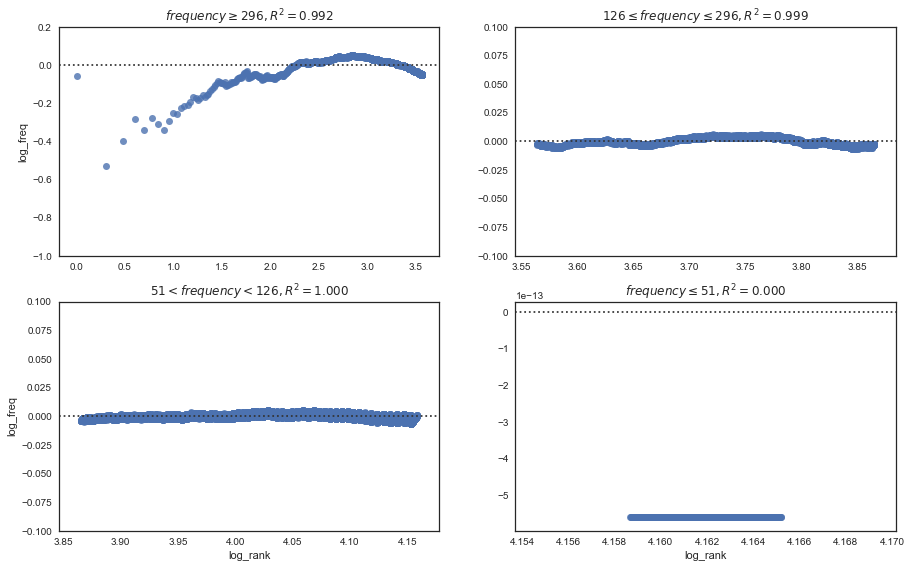

In [53]:
plt.subplot(221)
sns.residplot(log_rank_first,log_freq_first)
plt.title('$frequency \geq 296,R^2=0.992$')
plt.xlabel('')
plt.ylim(-1,0.2)
plt.subplot(222)
sns.residplot(log_rank_second,log_freq_second)
plt.title('$126 \leq frequency \leq 296,R^2=0.999$')
plt.xlabel('')
plt.ylabel('')
plt.ylim(-0.1,0.1)
plt.subplot(223)
sns.residplot(log_rank_third,log_freq_third)
plt.title('$51<frequency<126,R^2=1.000$')
plt.ylim(-0.1,0.1)
plt.subplot(224)
sns.residplot(log_rank_fourth,log_freq_fourth)
plt.title('$frequency \leq 51,R^2=0.000$')
plt.ylabel('')

<div style="font-size:16px;font-family:Courier New;font-weight:bold">
<p>From the above regression results, it can be seen that for words with a frequency greater than 296 (75% quantile), the applicability of zipf's law is poor, which can be seen from the larger regression residuals. For words with a frequency less than 296 and greater than 51, the applicability of zipf's law is very good, and the regression residual is close to zero. Since the words with the frequency less than or equal to 50 are removed from the data, the frequency of the last part of the data is 51, and the dependent variable is constant, so the regression has no meaning.</p>

<p>In summary, the word frequency distribution law of Chinese conforms to the zipf's law, and the low frequency words are more in line with the law than the high frequency words. According to the regression results, we can get log(f)=5.71-0.88log(r), and for every 1% increase in the rank of words, the frequency should drop by 0.88%.</p>

</div>

<h2 style="font-style:italic;font-family:Georgia;color:green">Analysis of the Distribution Law of the Number of Chinese Character Strokes</h2>

<div style="font-size:16px;font-family:Courier New;font-weight:bold">

<p>In <a href="https://onlinelibrary.wiley.com/doi/abs/10.1111/j.0039-3193.2004.00109.x">this paper</a>, Bengt Sigurd et al. found that the relationship between the length of a word in English and its frequency of occurrence is approximately obeying the gamma distribution, as shown below：</p>

<img src="https://ws1.sinaimg.cn/large/005LuiSpgy1fv95n53finj30io09n751.jpg">

<p>Although there is no such thing as the length of words in Chinese, the number of strokes in Chinese is similar to the length of words in English, because they all measure how much people are willing to pay in order to express a specific meaning. The length of the word can't be too short, because there will be too little vocabulary in this language, so it can't express enough meaning; the length of the word can't be too long, because the difficulty of people's memory will increase, thus reducing the efficiency of communication. This makes words that are too long or too short appear in English at a lower frequency.The same reason should be true for the number of strokes in Chinese. We can use the existing data to test the above hypothesis to see if the distribution of the number of strokes in Chinese characters is similar to the distribution of the length of English words, and also obey the gamma distribution.</p>

<p>At first,let us import the data and see the basic information of the data.</p>

</div>

In [54]:
sc = pd.read_excel('char_stroke_count.xlsx')
sc.head(10)

,rank,char,stroke_count
0,1,的,8
1,2,一,1
2,3,是,9
3,4,不,4
4,5,了,2
5,6,在,6
6,7,人,2
7,8,有,6
8,9,我,7
9,10,他,5


<p style="font-size:16px;font-family:Courier New;font-weight:bold">The third column stroke_count in the table indicates the number of strokes of the Chinese character. We can look at the histogram of the number of strokes in Chinese characters, which allows us to have an intuitive understanding of its distribution. We can find that the most common strokes number in Chinese characters are 10, 11 and 12, with frequencies of 9.23%, 9.34% and 9.18%, respectively.</p>

Text(0.5,1,'Histogram of the number of strokes in Chinese characters')

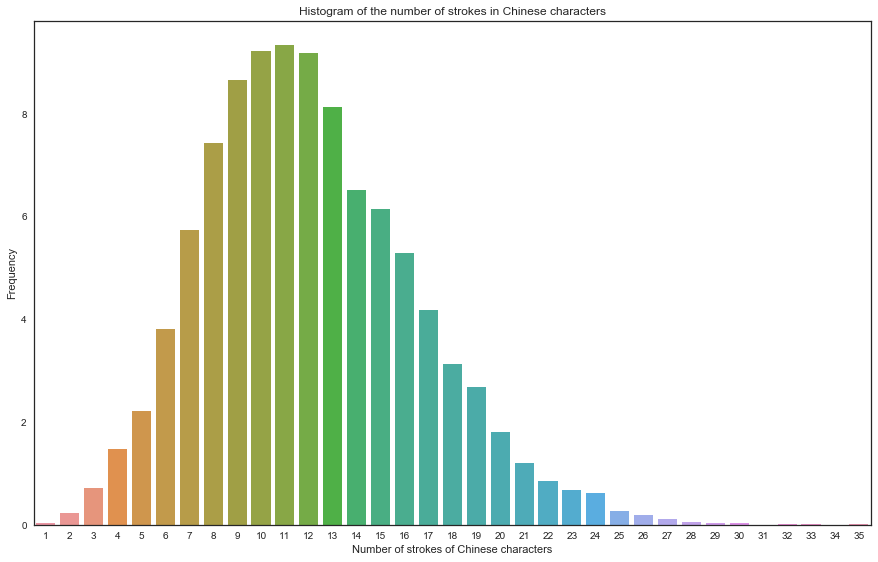

In [55]:
count_pert = []
for i in range(1,36):
    count_pert.append(len(sc.stroke_count[sc.stroke_count==i])/100.)

x = np.arange(1,36)
sns.barplot(x,count_pert)
plt.xlabel('Number of strokes of Chinese characters')
plt.ylabel('Frequency')
plt.title('Histogram of the number of strokes in Chinese characters')

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Next, we compare the actual distribution of the number of strokes in Chinese characters with the gamma distribution and the normal distribution. We find that the actual distribution of the number of strokes in Chinese characters is very close to the gamma distribution, and the difference from the normal distribution is large.</p>

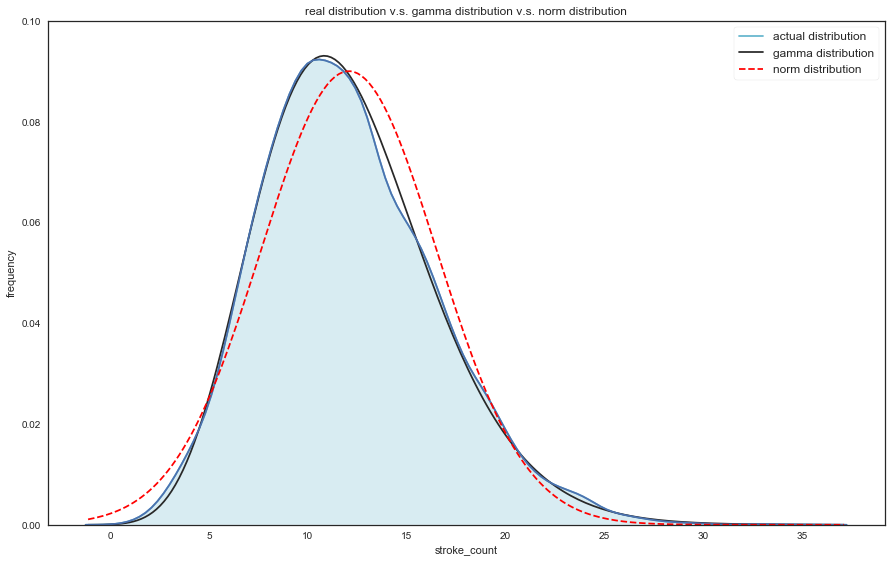

In [56]:
from scipy.stats import norm,gamma,kstest,probplot
sns.distplot(sc.stroke_count,hist=False,kde_kws={"shade": True,"label":"actual distribution"},
             fit=gamma,fit_kws={"label":"gamma distribution"},color='c')
sns.distplot(sc.stroke_count,hist=False,fit=norm,
             fit_kws={"label":"norm distribution","color":"red","linestyle":"--"})
plt.ylabel('frequency')
plt.title('real distribution v.s. gamma distribution v.s. norm distribution')
plt.ylim(0,0.1)
plt.legend(frameon=True,fontsize=12)

Text(0.5,1,'actual distribution v.s. norm distribution')

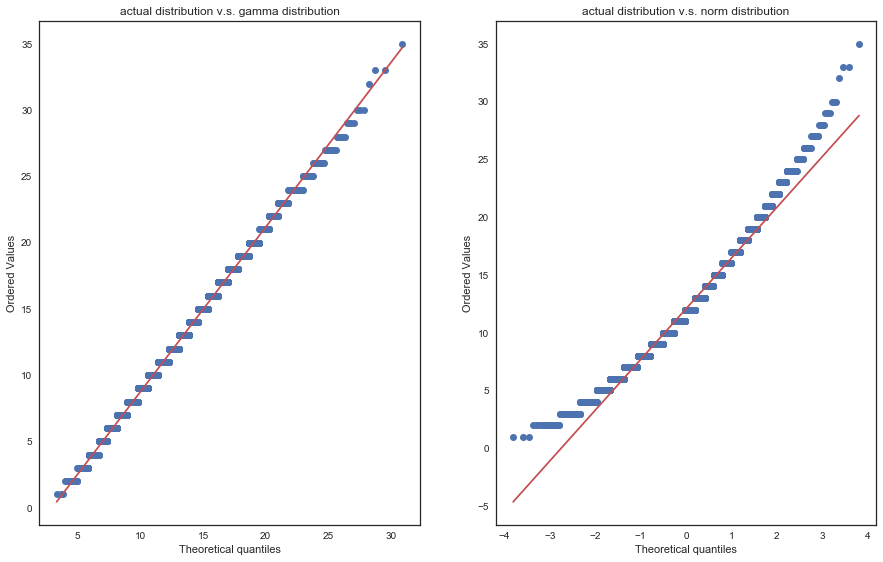

In [57]:
plt.subplot(121)
probplot(sc.stroke_count,plot=plt,dist='gamma',sparams=(12.68,),fit=True)
plt.title('actual distribution v.s. gamma distribution')
plt.subplot(122)
probplot(sc.stroke_count,plot=plt,dist='norm',fit=True)
plt.title('actual distribution v.s. norm distribution')

<h2 style="font-style:italic;font-family:Georgia;color:green">Conclusion</h2>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Interestingly, although there is a world of difference between Chinese and English, their distribution has many similarities. This makes it easier for us to believe that the reason why there are these distribution rules, more because of statistical reasons or because of the data generation process, not because of  the nature of the language itself. Further research in the future may give us an idea of why these laws are there.</p>

<p style="font-size:16px;font-family:Courier New;font-weight:bold">Thank you for reading this article, if you have any questions, you can leave a message on my GitHub</p>